<a href="https://colab.research.google.com/github/IALeMans/Meetup_ai-basics_2019-2/blob/master/1_ANN_supervised_classifier_ann_WR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARTIFICIAL NEURAL NETWORK
### Part 1 - Data Preprocessing > done

In [1]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=0dabde0aa594129b4b225d19739f1a9823d66926764de4fa1bd40bdb7510bb58
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


# Part 2 - Now let's make the ANN!

In [2]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


## get back datasets

In [0]:
import pickle
from numpy import array,matrix

In [0]:
url = 'https://github.com/IALeMans/Meetup_ai-basics_2019-2/raw/master/datasets.p'
filename = wget.download(url)

datasets_name = ['X_train', 'X_test', 'y_train', 'y_test']
f = open(filename, 'rb')
dataset = {}
for dataset_name in datasets_name:
    dataset[dataset_name]=(pickle.load(f))
f.close()

In [5]:
print(dataset['X_train'].shape)
print(dataset['X_test'].shape)
print(dataset['y_train'].shape)
print(dataset['y_test'].shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [6]:
dataset['X_train'][:5]

array([[-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
         0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
         1.10643166],
       [ 1.75486502, -0.57369368, -2.30455945,  0.91601335,  0.30102557,
        -1.37744033, -0.00631193, -0.92159124,  0.64259497,  0.9687384 ,
        -0.74866447],
       [-0.5698444 , -0.57369368, -1.19119591, -1.09168714, -0.94312892,
        -1.031415  ,  0.57993469, -0.92159124,  0.64259497, -1.03227043,
         1.48533467],
       [-0.5698444 ,  1.74309049,  0.03556578,  0.91601335,  0.10961719,
         0.00666099,  0.47312769, -0.92159124,  0.64259497, -1.03227043,
         1.27652776],
       [-0.5698444 ,  1.74309049,  2.05611444, -1.09168714,  1.73658844,
         1.04473698,  0.8101927 ,  0.8095029 ,  0.64259497,  0.9687384 ,
         0.55837842]])

## let's build your model

In [7]:
# Initialising the ANN
classifier = Sequential()

In [8]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(Dropout(p = 0.1))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))

In [0]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [11]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fitting the ANN to the Training set
import matplotlib.pyplot as plt

history = classifier.fit(dataset['X_train'], dataset['y_train'], validation_split=0.25, epochs=100, batch_size=100, verbose=1)
#history = classifier.fit(dataset['X_train'], dataset['y_train'], epochs=3, batch_size=16, verbose=1)




Train on 6000 samples, validate on 2000 samples
Epoch 1/100





6000/6000 [==============================] - 5s 780us/step - loss: 0.6812 - acc: 0.7900 - val_loss: 0.6644 - val_acc: 0.7995
Epoch 2/100
6000/6000 [==============================] - 0s 51us/step - loss: 0.6321 - acc: 0.7948 - val_loss: 0.5842 - val_acc: 0.7995
Epoch 3/100
6000/6000 [==============================] - 0s 55us/step - loss: 0.5310 - acc: 0.7948 - val_loss: 0.4813 - val_acc: 0.7995
Epoch 4/100
6000/6000 [==============================] - 0s 49us/step - loss: 0.4577 - acc: 0.7948 - val_loss: 0.4446 - val_acc: 0.7995
Epoch 5/100
6000/6000 [==============================] - 0s 53us/step - loss: 0.4344 - acc: 0.7948 - val_loss: 0.4349 - val_acc: 0.7995
Epoch 6/100
6000/6000 [==============================] - 0s 55us/step - loss: 0.4260 - acc: 0.8020 - val_loss: 0.4311 - val_acc: 0.8145
Epoch 7/100
6000/6000 [==============================] - 0s 50us/step - loss: 0.4216 - acc: 0.8135 - val_loss: 0.4276 - val_acc

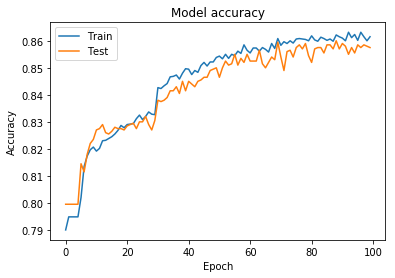

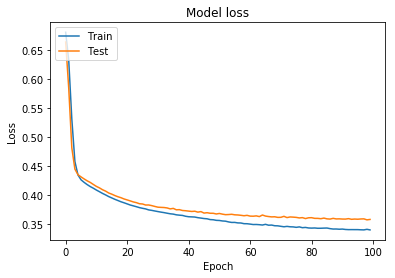

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
history.history


# Part 3 - Making predictions and evaluating the model

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(dataset['X_test'])

# ground truth
print('\nground truth')
print(dataset['y_test'][:5])

# predicted values
print('\npredictions')
print(y_pred[:5])


ground truth
[0 1 0 0 0]

predictions
[[0.29356053]
 [0.3318918 ]
 [0.14023453]
 [0.08690995]
 [0.05638936]]


In [18]:
# from percent to class
y_pred_class = (y_pred > 0.50)
print(y_pred_class[:5])

[[False]
 [False]
 [False]
 [False]
 [False]]


### Making the Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

y_pred_class = (y_pred > 0.50)

labels = ['stay', 'exit']
cm = confusion_matrix(dataset['y_test'], y_pred_class)

In [20]:
cm

array([[1514,   81],
       [ 204,  201]])

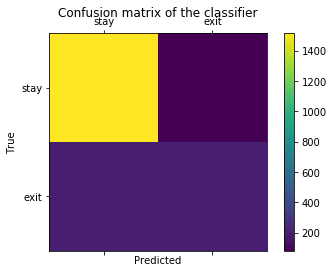

In [21]:
labels = ['stay', 'exit']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Predicting a single new observation

In [0]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
single_value = array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
#single_value = array([['France', 0, 600, 'Male', 40, 3, 60000, 2, 1, 1, 50000]])

In [23]:
# ANN input is matrix, not vector
single_value

array([[0.e+00, 0.e+00, 6.e+02, 1.e+00, 4.e+01, 3.e+00, 6.e+04, 2.e+00,
        1.e+00, 1.e+00, 5.e+04]])

### you need to apply EXACTLY the same pipeline as during training !!!

### get back transformers

In [28]:
url = 'https://github.com/IALeMans/Meetup_ai-basics_2019-2/raw/master/transformers.p'
filename = wget.download(url)

transformers_name = ['labelencoder_X_1', 'labelencoder_X_2', 'onehotencoder', 'scaler']
f = open(filename, 'rb')
transformer = {}
for transformer_name in transformers_name:
    transformer[transformer_name]=(pickle.load(f))
f.close()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator StandardScaler from version 0.21.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [29]:
transformer

{'labelencoder_X_1': LabelEncoder(),
 'labelencoder_X_2': LabelEncoder(),
 'onehotencoder': OneHotEncoder(categorical_features=[1], categories=None, drop=None,
               dtype=<class 'numpy.float64'>, handle_unknown='error',
               n_values=None, sparse=True),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [30]:
new_prediction = classifier.predict(transformer['scaler'].transform(single_value))
new_prediction_class = new_prediction > 0.5
print(new_prediction, new_prediction_class)

[[0.05921021]] [[False]]


# Part 4 - Evaluating, Improving and Tuning the ANN

In [0]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = dataset['X_train'], y = dataset['y_train'], cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()

In [0]:
classifier

In [0]:
accuracies

array([0.83499998, 0.83625001, 0.83625001, 0.82999998, 0.84875   ,
       0.83499998, 0.83875   , 0.85874999, 0.8075    , 0.79500002])

In [0]:
mean

0.8321249961853028

In [0]:
variance

0.01751828719095433

## Improving the ANN : Dropout Regularization to reduce overfitting if needed

In [0]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(p = 0.1))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  


In [0]:
classifier.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 6)                 72        
_________________________________________________________________
dropout_15 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_73 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_16 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = classifier.fit(dataset['X_train'], dataset['y_train'], validation_split=0.25, epochs=300, batch_size=100, verbose=1)

Train on 6000 samples, validate on 2000 samples
Epoch 1/300
6000/6000 [==============================] - 1s 133us/step - loss: 0.6814 - accuracy: 0.7887 - val_loss: 0.6647 - val_accuracy: 0.7995
Epoch 2/300
6000/6000 [==============================] - 0s 37us/step - loss: 0.6317 - accuracy: 0.7948 - val_loss: 0.5833 - val_accuracy: 0.7995
Epoch 3/300
6000/6000 [==============================] - 0s 38us/step - loss: 0.5333 - accuracy: 0.7948 - val_loss: 0.4842 - val_accuracy: 0.7995
Epoch 4/300
6000/6000 [==============================] - 0s 39us/step - loss: 0.4673 - accuracy: 0.7948 - val_loss: 0.4503 - val_accuracy: 0.7995
Epoch 5/300
6000/6000 [==============================] - 0s 48us/step - loss: 0.4496 - accuracy: 0.7948 - val_loss: 0.4442 - val_accuracy: 0.7995
Epoch 6/300
6000/6000 [==============================] - 0s 39us/step - loss: 0.4450 - accuracy: 0.7948 - val_loss: 0.4414 - val_accuracy: 0.7995
Epoch 7/300
6000/6000 [==============================] - 0s 39us/step - los

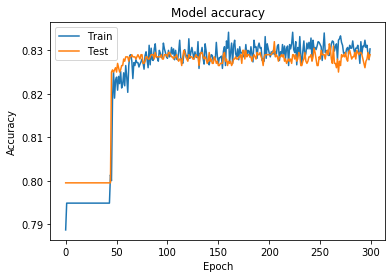

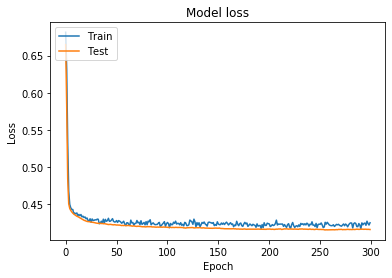

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
# under fitting vs over fitting

# Tuning the ANN

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    #classifier.add(Dropout(p = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    #classifier.add(Dropout(p = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(dataset['X_train'], dataset['y_train'])
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
7200/7200 [==============================] - 1s 156us/step - loss: 0.5734 - accuracy: 0.7953
Epoch 2/100
7200/7200 [==============================] - 1s 115us/step - loss: 0.4365 - accuracy: 0.7971
Epoch 3/100
7200/7200 [==============================] - 1s 107us/step - loss: 0.4302 - accuracy: 0.7971
Epoch 4/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.4276 - accuracy: 0.7971
Epoch 5/100
7200/7200 [==============================] - 1s 118us/step - loss: 0.4250 - accuracy: 0.7971
Epoch 6/100
7200/7200 [==============================] - 1s 123us/step - loss: 0.4227 - accuracy: 0.7971
Epoch 7/100
7200/7200 [==============================] - 1s 112us/step - loss: 0.4204 - accuracy: 0.7971
Epoch 8/100
7200/7200 [==============================] - 1s 127us/step - loss: 0.4187 - accuracy: 0.8083
Epoch 9/100
7200/7200 [==============================] - 1s 146us/step - loss: 0.4175 - accuracy: 0.8197
Epoch 10/100
7200/7200 [==============================]

In [0]:
best_parameters

In [0]:
best_accuracy